In [58]:
# Driven Cavity by the MAC Method
Nx = 32; Ny = 32; 
Lx = 1; Ly = 1; 
MaxStep = 50; 
Visc = 0.1; 
rho = 1.0; 
MaxIt = 100; 
Beta = 1.0; 
MaxErr = 0.001; # tham số cho SOR 
dx = Lx/Nx; 
dy = Ly/Ny; 
un = 1; 
us = 0; 
ve = 0; 
vw = 0; 
time = 0.0; 
dt = 0.002; 
x = zeros(Nx+1,Ny+1); 
y = zeros(Nx+1,Ny+1); 
u = zeros(Nx+1,Ny+2); 
v = zeros(Nx+2,Ny+1); 
p = zeros(Nx+2,Ny+2); 
ut = zeros(Nx+1,Ny+2); 
vt = zeros(Nx+2,Ny+1); 
uu = zeros(Nx+1,Ny+1); 
vv = zeros(Nx+1,Ny+1); 
pold = zeros(Nx+2,Ny+2); 
c = zeros(Nx+1,Ny+2)+1/(2/dx^2+2/dy^2);
c[2,3:Ny] = 1/(1/dx^2+2/dy^2); 
c[Nx+1,3:Ny] = 1/(1/dx^2+2/dy^2); 
c[3:Nx,2] = 1/(1/dx^2+2/dy^2); 
c[3:Nx,Ny+1] = 1/(1/dx^2+2/dy^2); 
c[2,2] = 1/(1/dx^2+1/dy^2); 
c[2,Ny+1] = 1/(1/dx^2+1/dy^2); 
c[Nx+1,2] = 1/(1/dx^2+1/dy^2); 
c[Nx+1,Ny+1] = 1/(1/dx^2+1/dy^2);
for i = 1:Nx+1
for j = 1:Ny+1
x[i,j] = dx*(i-1);
y[i,j] = dy*(j-1); 
end
end;

In [59]:
for is = 1:MaxStep 
	u[1:Nx+1,1] = 2*us - u[1:Nx+1,2]; 
    u[1:Nx+1,Ny+2] = 2*un - u[1:Nx+1,Ny+1]; 
    v[1,1:Ny+1] = 2*vw - v[2,1:Ny+1]; 
    v[Nx+2,1:Ny+1] = 2*ve - v[Nx+1,1:Ny+1];
                
	for i = 2:Nx 
		for j = 2:Ny+1 
			# temporary u-velocity 
			ut[i,j] = u[i,j]+dt*(-0.25*(
			( (u[i+1,j]+u[i,j])^2 - (u[i,j]+u[i-1,j])^2 )/dx+ 
			( (u[i,j+1]+u[i,j])*(v[i+1,j]+v[i,j])-
            (u[i,j]+u[i,j-1])*(v[i+1,j-1]+v[i,j-1]) )/dy )+ 
			Visc*((u[i+1,j]+u[i-1,j] - 2*u[i,j])/dx^2+
            (u[i,j+1]+u[i,j-1] - 2*u[i,j])/dy^2));
		end
	end
	for i = 2:Nx+1
		for j = 2:Ny # temporary v-velocity 
			vt[i,j] = v[i,j]+dt*(-0.25*(
			( (u[i,j+1]+u[i,j])*(v[i+1,j]+v[i,j])-
			(u[i-1,j+1]+u[i-1,j])*(v[i,j]+v[i-1,j]) )/dx+
            ( (v[i,j+1]+v[i,j])^2 - (v[i,j]+v[i,j-1])^2 )/dy )+
			Visc*((v[i+1,j]+v[i-1,j] - 2*v[i,j])/dx^2+
            (v[i,j+1]+v[i,j-1] - 2*v[i,j])/dy^2));
		end
	end

	for it = 1:MaxIt # solve for pressure 
	pold = p;                
	for i = 2:Nx+1
		for j = 2:Ny+1
			p[i,j] = Beta*c[i,j]*
			( (p[i+1,j]+p[i-1,j])/dx^2+(p[i,j+1]+p[i,j-1])/dy^2 -
			(rho/dt)* ( (ut[i,j] - ut[i-1,j])/dx+
            (vt[i,j] - vt[i,j-1])/dy ) ) + (1-Beta)*p[i,j]; 
		end
	end
	Err = 0.0; 
	for i = 2:Nx+1
		for j = 2:Ny+1
			# check error 
			Err = Err+abs(pold[i,j]-p[i,j]); 
		end
	end;
	if Err <=  MaxErr
		break
	end # stop if converged 
	end

	# correct the velocity
    u[2:Nx,2:Ny+1] = ut[2:Nx,2:Ny+1] - (dt/dx)*(p[3:Nx+1,2:Ny+1] - p[2:Nx,2:Ny+1]);
	v[2:Nx+1,2:Ny] = vt[2:Nx+1,2:Ny] - (dt/dy)*(p[2:Nx+1,3:Ny+1] - p[2:Nx+1,2:Ny]);
	time = time+dt # plot the results 
    uu[1:Nx+1,1:Ny+1] = 0.5*(u[1:Nx+1,2:Ny+2]+u[1:Nx+1,1:Ny+1]); 
    vv[1:Nx+1,1:Ny+1] = 0.5*(v[2:Nx+2,1:Ny+1]+v[1:Nx+1,1:Ny+1]); 
	# quiver(x,y,uu,vv,’linewidth’,1); hold on
	# axis equal; 
	# axis([0,1,0,1]); 
	# hold off,pause(0.01) 
end

In [60]:
time 

0.10000000000000007

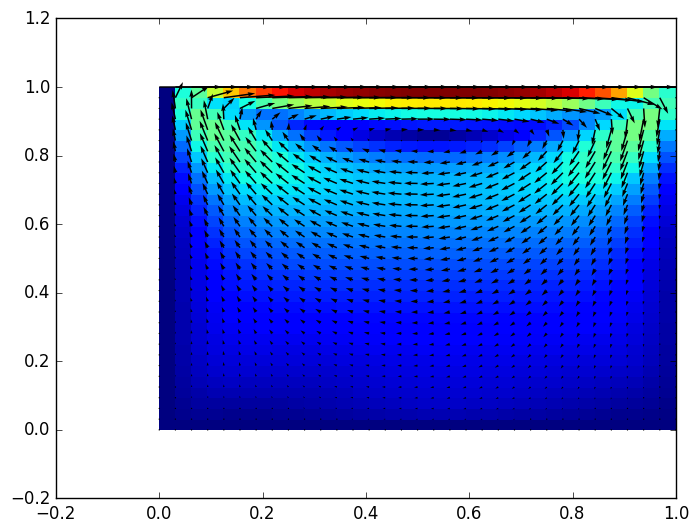

PyObject <matplotlib.quiver.Quiver object at 0x31f553950>

In [74]:
using PyPlot
# pcolor(x, y, p[2:end, 2:end])
pcolor(x, y, sqrt(uu.^2 + vv.^2))
quiver(x, y, uu, vv, hold=true)
